In [ ]:
!pip install pyreadstat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 10.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import pyreadstat
from google.colab import files
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Creación del Dataset

In [ ]:
# Upload EH2021_Persona.sav
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

KeyboardInterrupt: ignored

In [ ]:
file = "./EH2021_Persona.sav"

df, meta = pyreadstat.read_sav(file)
labels_dict = {var: meta.variable_value_labels[var] for var in meta.variable_value_labels}

df.replace(labels_dict, inplace=True)

In [ ]:
columns_of_interest = [
    "depto",
    "area",
    "s01a_02", #sexo
    "s01a_03", #edad
    "s01a_05", #jefe del hogar",
    "s01a_10", #estado civil
    "totper", #total de personas en el hogar
    "s01a_07_1", #idiomas 1
    "s01a_07_2", #idiomas 2
    "s01a_07_3", #idiomas 3
    "niv_ed", #nivel educativo
    "cobersalud", #seguro de salud
    "s02a_14a", #discapacidad
    "hnv_ult_a", #ha tenido hijos el ultimo año?
    "cob_op", #ocupación principal
    "ocupado", #trabaja?
    "yper", #ingresos
    "s04f_34a", #luego de gastos, cuanto le queda para el hogar?,
    "s03c_13", #tiene celular?
    "s03c_13a", #se conecta a internet?
]

In [ ]:
df = df.loc[:, columns_of_interest]

df = df[df["s01a_05"] == "1. JEFE O JEFA DEL HOGAR"]
#filas = df_reduced[np.logical_and(df_reduced["s01a_05"] == "1. JEFE O JEFA DEL HOGAR", df_reduced["s01a_05a"] == 2.0)]
df

##Análisis exploratorio de datos

In [ ]:
for columna in df.columns:
    valores_unicos = df[columna].nunique()
    print(f"{columna}, {valores_unicos}")

In [ ]:
nan_counts = df.isna().sum()
nan_percentages = (nan_counts / len(df)) * 100

In [ ]:
for count in nan_counts: print(count)

In [ ]:
for percentage in nan_percentages: print(percentage)

In [ ]:
df.dtypes

###Univariado

### TENDENCIA CENTRAL
- Moda
- Mediana

In [ ]:
variables_cualitativas = []
for columna in df.columns:
    if df[columna].dtype == 'object':
        variables_cualitativas.append(columna)

# Imprimir las variables cualitativas
print("Variables cualitativas:")
print(variables_cualitativas)

In [ ]:
# Identificar variables cuantitativas
variables_cuantitativas = []
for columna in df.columns:
    if df[columna].dtype == 'float64':
        variables_cuantitativas.append(columna)

# Imprimir las variables cuantitativas
print("Variables cuantitativas:")
print(variables_cuantitativas)

In [ ]:
for variable in variables_cuantitativas:
    media = df[variable].mean()
    mediana = df[variable].median()
    print(f"Variable: {variable}")
    print(f"Media: {media}")
    print(f"Mediana: {mediana}")
    print("---")

### Dispersión
- Rango (Max - Min)
- Cuartiles
- RIC
- Varianza
- Desviacion Estandar
- Boxplot

In [ ]:
for variable in variables_cuantitativas:
  #Rango (max - min)
  print ("Estadisticas de dispersion de: " + variable)
  maximo = df[variable].max()
  minimo = df[variable].min()
  print (f" max: {maximo} \n min: {minimo}")
  rango = maximo-minimo
  print (f"el rango de {variable} es:\n {rango}")
  #Desviacion estandar
  des_est = df[variable].std()
  print (f"la desviacion estandar de {variable} es:\n {des_est}")
  #varianza
  varianza = df[variable].var()
  print (f"la varianza de {variable} es:\n {varianza}")
  #quartiles
  q1, q3 = np.percentile(df[variable].dropna(), [25,75])
  print (f"Cuartiles:\n q1: {q1} \n q3: {q3}")
  RIC = q3 - q1
  print (f"el RIC de {variable} es:\n {RIC}")
  print ('----')

#Grafico Boxplot
#df.boxplot('variable')
#plt.show()


### GRAFICAS
- Boxplot

- Barras

- histogramas

In [ ]:
df.boxplot(variables_cuantitativas[0])

In [ ]:
df.boxplot(variables_cuantitativas[1])

In [ ]:
df.boxplot(variables_cuantitativas[2])

In [ ]:
df.boxplot(variables_cuantitativas[3])

In [ ]:
df.boxplot(variables_cuantitativas)

In [ ]:

group_jh_dpto = df.groupby(['s01a_05', 'depto']).size().unstack()
# Crear el gráfico de barras apiladas
group_jh_dpto.plot(kind='bar')

# Agregar etiquetas y título al gráfico
plt.xlabel('Jefe de Hogar')
plt.ylabel('Frecuencia')
plt.title('Distribución de Jefes/as de Hogar por Departamento')

# Mostrar el gráfico
#plt.show()

In [ ]:
# Filtrar el DataFrame por las columnas de interés
df_sexo_estado_civil = df[['s01a_02', 's01a_10']]

# Contar el número de ocurrencias de cada combinación de sexo y estado civil
count_table = df_sexo_estado_civil.groupby(['s01a_02', 's01a_10']).size().unstack()

# Crear el gráfico de barras apiladas
fig, ax = plt.subplots()
count_table.plot(kind='bar', stacked=True, ax=ax)

# Configurar los ejes y la leyenda
ax.set_xlabel('Sexo')
ax.set_ylabel('Frecuencia')
ax.set_title('Distribución de Estado Civil por Sexo')
ax.legend(title='Estado Civil')

# Mostrar el gráfico
plt.show()

In [ ]:
# Agrupar los datos por "depto" y "area"
grupo = df.groupby(['depto', 'area']).size().unstack()

# Crear el gráfico de barras
grupo.plot(kind='bar', stacked=True)

# Personalizar el gráfico
plt.title('Distribución por Departamento y Área')
plt.xlabel('Departamento')
plt.ylabel('Cantidad de personas')
plt.legend(title='Área')

# Mostrar el gráfico
plt.show()

In [ ]:
# Agrupar los datos por nivel educativo y departamento
grupo = df.groupby(['niv_ed', 'depto']).size().unstack()

# Crear el gráfico de barras
grupo.plot(kind='bar', stacked=True)

# Personalizar el gráfico
plt.title('Distribución por Nivel Educativo y Departamento')
plt.xlabel('Departamento')
plt.ylabel('Cantidad de personas')
plt.legend(title='Nivel Educativo')

# Mostrar el gráfico
plt.show()

In [ ]:
# Agrupar los datos por nivel educativo y área
grupo = df.groupby(['niv_ed', 'area']).size().unstack()

# Crear el gráfico de barras
grupo.plot(kind='bar', stacked=True)

# Personalizar el gráfico
plt.title('Distribución por Nivel Educativo y Área')
plt.xlabel('Nivel de Educación')
plt.ylabel('Cantidad de personas')
plt.legend(title='Área')

# Mostrar el gráfico
plt.show()

In [ ]:
# Agrupar los datos por "cobersalud" y "depto"
grupo = df.groupby(['cobersalud', 'depto']).size().unstack()

# Crear el gráfico de barras
grupo.plot(kind='bar', stacked=True)

# Personalizar el gráfico
plt.title('Distribución por Cobertura de Salud y Departamento')
plt.xlabel('Cobertura de Salud')
plt.ylabel('Cantidad de personas')
plt.legend(title='Departamento')

# Mostrar el gráfico
plt.show()

In [ ]:
# Agrupar los datos por "departamento" y "ocupado"
grupo = df.groupby(['depto', 'ocupado']).size().unstack()

# Crear el gráfico de barras
grupo.plot(kind='bar', stacked=True)

# Personalizar el gráfico
plt.title('Distribución de Personas con trabajo por Departamento')
plt.xlabel('Departamento')
plt.ylabel('Cantidad de personas')
plt.legend(title='Tiene trabajo?')

# Mostrar el gráfico
plt.show()

In [ ]:
# Agrupar los datos por "departamento" y "cob_op"
grupo = df.groupby(['cob_op', 'depto']).size().unstack()

# Crear el gráfico de barras
grupo.plot(kind='bar', stacked=True)

# Personalizar el gráfico
plt.title('Distribución de Personas en cada Departamento con Ocupación Principal')
plt.xlabel('Ocupacion Principal')
plt.ylabel('Cantidad de personas')
plt.legend(title='Departamento')

# Mostrar el gráfico
plt.show()

In [ ]:
for variable in variables_cuantitativas:
  df[variable].hist(bins=10)
  plt.show()

###Bivariado

In [ ]:
df.dtypes

In [ ]:
# Seleccionar las variables para el gráfico bivariado
variables = ['niv_ed'] + list(df.columns.difference(['niv_ed']))

# Generar el gráfico bivariado
sns.pairplot(df[variables])

In [ ]:
# Seleccionar las variables para el gráfico bivariado
variables = ['cobersalud'] + list(df.columns.difference(['cobersalud']))

# Generar el gráfico bivariado
sns.pairplot(df[variables])

In [ ]:
# Seleccionar las variables para el gráfico bivariado
variables = ['cob_op'] + list(df.columns.difference(['cob_op']))

# Generar el gráfico bivariado
sns.pairplot(df[variables])

###Perfilado

In [ ]:
# Obtener el resumen estadístico de las variables numéricas
summary_numeric = df.describe()

# Obtener el conteo y las categorías únicas de las variables categóricas
summary_categorical = df.describe(include='object')

# Mostrar el resumen estadístico
print("Resumen estadístico de variables numéricas:")
print(summary_numeric)
print("\nResumen de variables categóricas:")
print(summary_categorical)

In [ ]:
# Generar histogramas de las variables numéricas
df.hist(figsize=(10, 10))
plt.tight_layout()
plt.show()

In [ ]:
# Contar la frecuencia de cada categoría en las variables categóricas
for column in df.select_dtypes(include='object'):
    print(f"Frecuencia de categorías en {column}:")
    print(df[column].value_counts())
    print()

In [ ]:
import seaborn as sns

# Generar una matriz de correlación entre variables numéricas
correlation_matrix = df.select_dtypes(include=['float64', 'int64']).corr()

# Visualizar la matriz de correlación como un mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Matriz de correlación")
plt.show()

In [ ]:
!pip install dataprep

In [ ]:
#df_sample = df.sample(100000)
from dataprep.eda import create_report
create_report(df).show()

##Preparación de datos

###One hot encoding

In [ ]:
columns_to_encode = [
    "depto",
    "area",
    "s01a_02", #sexo
    "s01a_05", #jefe del hogar",
    "hnv_ult_a", #tuvo hijos este último año
    "s01a_10", #estado civil
    "s01a_07_1", #idiomas 1
    "s01a_07_2", #idiomas 2
    "s01a_07_3", #idiomas 3
    "niv_ed", #nivel educativo
    "cobersalud", #seguro de salud
    "s02a_14a", #discapacidad
    "cob_op", #ocupación principal
    "ocupado", #trabaja?
    "s03c_13", #tiene celular?
    "s03c_13a", #se conecta a internet?
]
df_encoded = pd.get_dummies(
    df,
    columns=columns_to_encode
)
print("dataframe size:", len(df_encoded))
df_encoded.head()

###Outliers

In [ ]:
df_filtered = df_encoded.copy()
columns_to_check = [
    "s01a_03", #edad
    "totper", #total de personas en el hogar
    "yper", #ingresos
    "s04f_34a", #luego de gastos, cuanto le queda para el hogar?
]
# Calcular el z-score para las columnas seleccionadas
z_scores = stats.zscore(df_filtered[columns_to_check])

# Definir el umbral para identificar outliers (por ejemplo, 2 desviaciones estándar)
umbral = 2

# Filtrar los outliers en las columnas seleccionadas
filas_filtradas = df_filtered[((z_scores < -umbral) | (z_scores > umbral)).any(axis=1)]

# Eliminar outliers
df_filtered = df_filtered.drop(filas_filtradas.index)

# Mostrar el resultado
print(len(df_filtered))
df_filtered.head()

###Imputar datos faltantes

In [ ]:
# Llenar datos faltantes en la columna s04f_34a (cuánto dinero queda después de gastos)con CEROS.
df_filtered['s04f_34a'].fillna(0, inplace=True)

# Imputación por media
df_filtered[columns_to_check] = df_filtered[
    columns_to_check
].fillna(df_filtered[columns_to_check].mean())
print(len(df_filtered))
df_filtered.head()

###Re-escalar los datos en transformaciones z-score

In [ ]:
from sklearn.preprocessing import StandardScaler

columnas_cuantitativas = columns_to_check

# Crear un objeto StandardScaler
scaler = StandardScaler()

# Ajustar y transformar los datos
df_filtered[columnas_cuantitativas] = scaler.fit_transform(
    df_filtered[columnas_cuantitativas]
)
df_filtered.head()

###Eliminar variables que contengan más del 50% de valores nulos

In [ ]:
# Calcula el porcentaje de valores nulos en cada columna
porcentaje_nulos = df_filtered.isnull().mean()

# Obtén las columnas que tienen más del 50% de valores nulos
columnas_eliminar = porcentaje_nulos[porcentaje_nulos > 0.5].index

# Elimina las columnas del DataFrame
df_filtered = df_filtered.drop(columnas_eliminar, axis=1)
print(len(df_filtered))
df_filtered.head()

In [ ]:
df_filtered

In [ ]:
df_filtered.columns = df_filtered.columns.str.replace(r'[^a-zA-Z0-9]+', '_', regex=True)

In [ ]:
df_filtered.to_csv("data.csv")

# Modelado

In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.1-py2.py3-none-any.whl size=311285387 sha256=f29ecf818ac508e59b6d130deb57d804c65a29f2d6facaca90fc174789aec9f1
  Stored in directory: /root/.cache/pip/wheels/0d/77/a3/ff2f74cc9ab41f8f594dabf0579c2a7c6de920d584206e0834
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import ClusteringEvaluator

In [ ]:
spark = SparkSession.builder.appName("KMeans").getOrCreate()

In [ ]:
data = spark.read.csv("data.csv", header=True, inferSchema=True)

In [ ]:
feature_columns = list(data.columns)
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
data = assembler.transform(data)

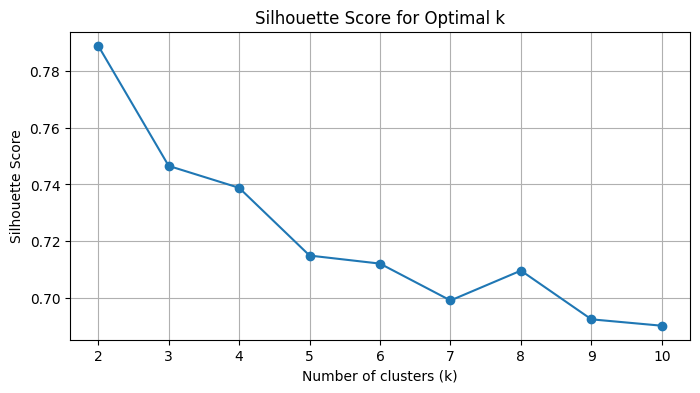

In [ ]:
silhouette_scores = []
max_k = 10
for k in range(2, max_k + 1):
    kmeans = KMeans().setK(k).setSeed(1)
    model = kmeans.fit(data)
    predictions = model.transform(data)
    evaluator = ClusteringEvaluator(metricName="silhouette")
    silhouette_score = evaluator.evaluate(predictions)
    silhouette_scores.append(silhouette_score)

plt.figure(figsize=(8, 4))
plt.plot(range(2, max_k + 1), silhouette_scores, marker='o', linestyle='-')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [ ]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

# Define a range of K values you want to try
k_values = range(2, 11)  # Try K values from 2 to 10

# Initialize lists to store the K values and corresponding cost
k_values_list = []
cost_list = []

for k in k_values:
    kmeans = KMeans().setK(k).setSeed(1)  # Set the number of clusters (K)
    model = kmeans.fit(data)
    predictions = model.transform(data)

    # Evaluate clustering by computing the Within Set Sum of Squared Errors (WSSSE)
    evaluator = ClusteringEvaluator()
    silhouette_score = evaluator.evaluate(predictions)

    k_values_list.append(k)
    cost_list.append(silhouette_score)

# Display the K values and their corresponding cost (inertia)
for k, cost in zip(k_values_list, cost_list):
    print(f"K = {k}: Silhouette Score = {cost}")

K = 2: Silhouette Score = 0.7888231612652044
K = 3: Silhouette Score = 0.7465448648277718
K = 4: Silhouette Score = 0.7388212398720222
K = 5: Silhouette Score = 0.714995820218773
K = 6: Silhouette Score = 0.712158009615008
K = 7: Silhouette Score = 0.6991896814979223
K = 8: Silhouette Score = 0.7097021163313417
K = 9: Silhouette Score = 0.6925554314069928
K = 10: Silhouette Score = 0.690307326454517


* 3 parece ser n valor óptimo, luego de ese valor el comportamiento es complicado de interpretar

In [ ]:
kmeans = KMeans().setK(3).setSeed(42)

In [ ]:
model = kmeans.fit(data)

In [ ]:
predictions = model.transform(data)

In [ ]:
predictions.show(n=5)

+---+-------------------+--------------------+-------------------+--------------------+----------+----------------+----------------+------------+-----------+-----------+------------+----------------+------------+----------+-----------+----------------+---------------+-------------------------------+-----------------+----------------------------------+-------------------+------------------+-----------------------------------+--------------------+----------------------+-----------------+--------------------+--------------------+------------------------+--------------------+---------------------+---------------------+------------------------------+---------------------+------------------------+-----------------------+--------------------+---------------------+--------------------+-----------------------+--------------------+--------------------+-----------------------+------------------------+----------------------+--------------------+---------------------+---------------------+---------

In [ ]:
evaluator = ClusteringEvaluator(metricName="silhouette")
silhouette_score = evaluator.evaluate(predictions)
silhouette_score

0.7465389907772665

* Se tiene bastante separación de los grupos

## Distribución de los clústers

In [ ]:
cluster_counts = predictions.groupBy("prediction").count().toPandas()

In [ ]:
cluster_counts

,prediction,count
0,1,3831
1,2,3765
2,0,3973


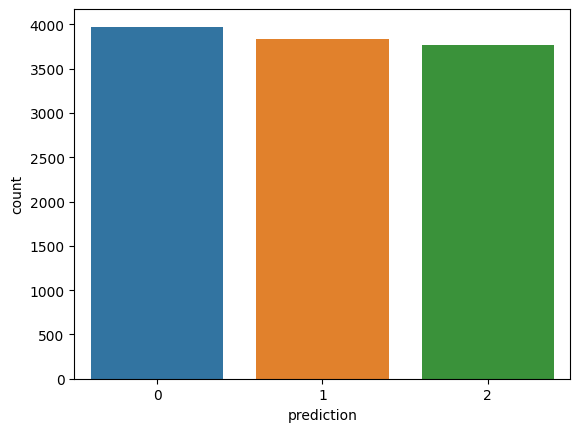

In [ ]:
sns.barplot(x="prediction", y="count", data=cluster_counts)
plt.show()

* Se ve homogéneo en la cantidad, los grupos son balanceados

## Heatmap

In [ ]:
predictions.toPandas().to_csv("clustering.csv")

In [ ]:
predictions_pandas = predictions.sample(fraction=0.5).toPandas()

In [ ]:
predictions_pandas.columns.tolist()

['_c0',
 's01a_03',
 'totper',
 'yper',
 's04f_34a',
 'depto_Beni',
 'depto_Chuquisaca',
 'depto_Cochabamba',
 'depto_La_Paz',
 'depto_Oruro',
 'depto_Pando',
 'depto_Potos_',
 'depto_Santa_Cruz',
 'depto_Tarija',
 'area_Rural',
 'area_Urbana',
 's01a_02_1_Hombre',
 's01a_02_2_Mujer',
 's01a_05_1_JEFE_O_JEFA_DEL_HOGAR',
 'hnv_ult_a_No_tuvo',
 'hnv_ult_a_Tuvo_un_hijo_nacido_vivo',
 's01a_10_1_SOLTERO_A',
 's01a_10_2_CASADO_A',
 's01a_10_3_CONVIVIENTE_O_CONCUBINO_A',
 's01a_10_4_SEPARADO_A',
 's01a_10_5_DIVORCIADO_A',
 's01a_10_6_VIUDO_A',
 's01a_07_1_002_AYMARA',
 's01a_07_1_004_B_SIRO',
 's01a_07_1_006_CASTELLANO',
 's01a_07_1_010_CHIMAN',
 's01a_07_1_012_GUARANI',
 's01a_07_1_014_GUARAYU',
 's01a_07_1_020_MOJE_O_IGNACIANO',
 's01a_07_1_027_QUECHUA',
 's01a_07_1_032_URUCHIPAYA',
 's01a_07_1_033_WEENHAYEK',
 's01a_07_1_041_ALEMAN',
 's01a_07_1_046_COREANO',
 's01a_07_1_054_INGLES',
 's01a_07_1_058_PORTUGUES',
 's01a_07_2_002_AYMARA',
 's01a_07_2_004_B_SIRO',
 's01a_07_2_005_CANICHANA',


In [ ]:
# List of columns to consolidate (those with the "depto_" prefix)
depto_columns = [col for col in predictions_pandas.columns if col.startswith("depto_")]
# Create a new "depto" column with the value from the matching prefix column
predictions_pandas["depto"] = predictions_pandas[depto_columns].apply(lambda row: row.idxmax().split("_")[1], axis=1)
# Drop the consolidated columns
predictions_pandas.drop(columns=depto_columns, inplace=True)


In [ ]:
#GENERO
# List of columns to consolidate (those with the "depto_" prefix)
depto_columns = [col for col in predictions_pandas.columns if col.startswith("s01a_02_")]
# Create a new "depto" column with the value from the matching prefix column
predictions_pandas["genero"] = predictions_pandas[depto_columns].apply(lambda row: row.idxmax().split("_")[3], axis=1)
# Drop the consolidated columns
predictions_pandas.drop(columns=depto_columns, inplace=True)


In [ ]:
#IDIOMA 1
# List of columns to consolidate (those with the "depto_" prefix)
depto_columns = [col for col in predictions_pandas.columns if col.startswith("s01a_07_1_")]
# Create a new "depto" column with the value from the matching prefix column
predictions_pandas["idioma_1"] = predictions_pandas[depto_columns].apply(lambda row: row.idxmax().split("_")[4], axis=1)
# Drop the consolidated columns
predictions_pandas.drop(columns=depto_columns, inplace=True)

In [ ]:
#IDIOMA 2
# List of columns to consolidate (those with the "depto_" prefix)
depto_columns = [col for col in predictions_pandas.columns if col.startswith("s01a_07_2_")]
# Create a new "depto" column with the value from the matching prefix column
predictions_pandas["idioma_2"] = predictions_pandas[depto_columns].apply(lambda row: row.idxmax().split("_")[4], axis=1)
# Drop the consolidated columns
predictions_pandas.drop(columns=depto_columns, inplace=True)

In [ ]:
#IDIOMA 3
# List of columns to consolidate (those with the "depto_" prefix)
depto_columns = [col for col in predictions_pandas.columns if col.startswith("s01a_07_3_")]
# Create a new "depto" column with the value from the matching prefix column
predictions_pandas["idioma_3"] = predictions_pandas[depto_columns].apply(lambda row: row.idxmax().split("_")[4], axis=1)
# Drop the consolidated columns
predictions_pandas.drop(columns=depto_columns, inplace=True)

In [ ]:
#NIVEL EDUCATIVO
# List of columns to consolidate (those with the "depto_" prefix)
depto_columns = [col for col in predictions_pandas.columns if col.startswith("niv_ed_")]
# Create a new "depto" column with the value from the matching prefix column
predictions_pandas["niv_educativo"] = predictions_pandas[depto_columns].apply(lambda row: row.idxmax().split("_")[2], axis=1)
# Drop the consolidated columns
predictions_pandas.drop(columns=depto_columns, inplace=True)

In [ ]:
import pandas as pd

# Sample DataFrame with one-hot encoded columns
data = {
    's02a_14a_1_F_sica': [1, 0, 0, 1],
    's02a_14a_2_Visual': [0, 1, 0, 0],
    's02a_14a_3_Auditiva': [0, 0, 1, 0],
    's02a_14a_4_Intelectual': [0, 0, 0, 0],
    's02a_14a_5_Mental_o_ps_quica': [0, 0, 0, 1],
    's02a_14a_6_M_ltiple': [0, 0, 0, 0],
}

predictions_pandas = pd.DataFrame(data)

# Define a dictionary for column renaming
columns_to_replace = {
    's02a_14a_1_F_sica': 'FISICA',
    's02a_14a_2_Visual': 'VISUAL',
    's02a_14a_3_Auditiva': 'AUDITIVA',
    's02a_14a_4_Intelectual': 'INTELECTUAL',
    's02a_14a_5_Mental_o_ps_quica': 'MENTAL O PSIQUICA',
    's02a_14a_6_M_ltiple': 'MULTIPLE',
}

# Create the "Discapacidad" column based on the dictionary
predictions_pandas['Discapacidad'] = predictions_pandas.apply(lambda row: ', '.join([columns_to_replace[col] for col in columns_to_replace if row[col] == 1]), axis=1)

print(predictions_pandas)
# Drop the original one-hot encoded columns
#predictions_pandas.drop(columns=list(columns_to_replace.keys()), inplace=True)

# Display the resulting DataFrame
#print(predictions_pandas)


   s02a_14a_1_F_sica  s02a_14a_2_Visual  s02a_14a_3_Auditiva  \
0                  1                  0                    0   
1                  0                  1                    0   
2                  0                  0                    1   
3                  1                  0                    0   

   s02a_14a_4_Intelectual  s02a_14a_5_Mental_o_ps_quica  s02a_14a_6_M_ltiple  \
0                       0                             0                    0   
1                       0                             0                    0   
2                       0                             0                    0   
3                       0                             1                    0   

                Discapacidad  
0                     FISICA  
1                     VISUAL  
2                   AUDITIVA  
3  FISICA, MENTAL O PSIQUICA  


In [ ]:
predictions_pandas

,_c0,s01a_03,totper,yper,s04f_34a,depto_Beni,depto_Chuquisaca,depto_Cochabamba,depto_La_Paz,depto_Oruro,...,cob_op_Trabajadores_en_Agricultura_Pecuaria_Pesca_y_otros,cob_op_T_cnicos_de_Nivel_Medio,ocupado_No,ocupado_Si,s03c_13_1_Si,s03c_13_2_No,s03c_13a_1_Si,s03c_13a_2_No,features,prediction
0,0,0.695170,1.270220,1.603641,-0.086791,0,1,0,0,0,...,0,0,0,1,1,0,0,1,"(0.0, 0.695170292927309, 1.270219999025752, 1....",2
1,11,1.704485,-1.449849,-1.105212,-0.086791,0,1,0,0,0,...,0,0,1,0,0,1,0,0,"(11.0, 1.7044854605782263, -1.4498494445150023...",2
2,12,-1.256172,-0.089815,0.577918,-0.086791,0,1,0,0,0,...,0,0,0,1,1,0,1,0,"(12.0, -1.2561723645311307, -0.089814722744625...",2
3,44,-0.785159,0.590203,-0.438242,-0.086791,0,1,0,0,0,...,0,0,0,1,1,0,1,0,"(44.0, -0.7851586196273693, 0.5902026381405634...",2
4,71,-0.852446,1.950237,0.235642,-0.055092,0,1,0,0,0,...,0,0,0,1,1,0,1,0,"(71.0, -0.8524462974707638, 1.9502373599109406...",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5801,42034,-1.054309,-0.769832,-0.727771,-0.086791,0,0,0,0,0,...,0,0,1,0,0,1,0,0,"(42034.0, -1.0543093310009473, -0.769832083629...",1
5802,42051,-1.188885,1.950237,-0.766919,-0.086791,0,0,0,0,0,...,1,0,0,1,0,1,0,0,"(42051.0, -1.1888846866877363, 1.9502373599109...",1
5803,42065,-0.112282,1.950237,-0.833581,-0.086791,0,0,0,0,0,...,1,0,0,1,1,0,0,1,"(42065.0, -0.11228184119342462, 1.950237359910...",1
5804,42080,-0.919734,-1.449849,-0.043429,-0.086791,0,0,0,0,0,...,0,0,0,1,1,0,1,0,"(42080.0, -0.9197339753141582, -1.449849444515...",1


<ipython-input-99-9433e5740978>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['prediction'] = predictions_pandas['prediction']


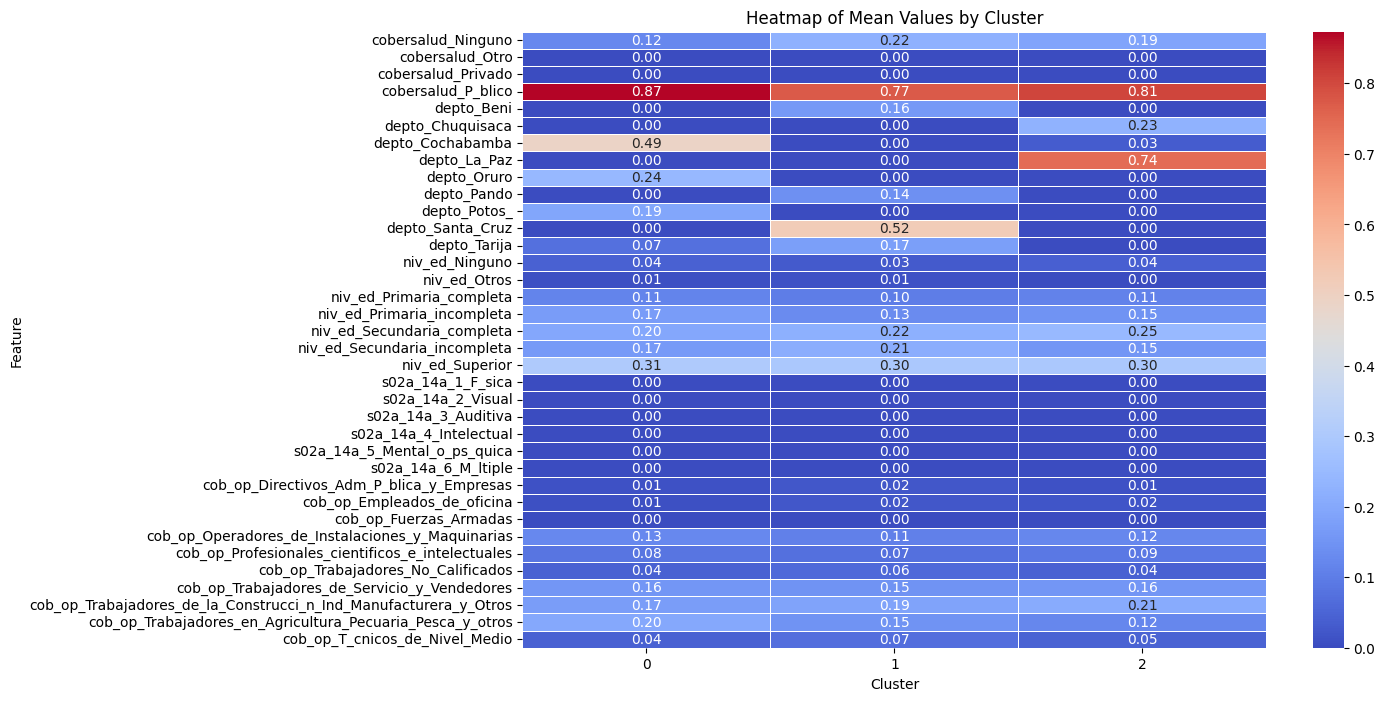

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns of interest, including the additional 'depto_*' columns
selected_columns = [
    'cobersalud_Ninguno',
    'cobersalud_Otro',
    'cobersalud_Privado',
    'cobersalud_P_blico',
    'depto_Beni',
    'depto_Chuquisaca',
    'depto_Cochabamba',
    'depto_La_Paz',
    'depto_Oruro',
    'depto_Pando',
    'depto_Potos_',
    'depto_Santa_Cruz',
    'depto_Tarija',
    'niv_ed_Ninguno',
    'niv_ed_Otros',
    'niv_ed_Primaria_completa',
    'niv_ed_Primaria_incompleta',
    'niv_ed_Secundaria_completa',
    'niv_ed_Secundaria_incompleta',
    'niv_ed_Superior',
    's02a_14a_1_F_sica',
    's02a_14a_2_Visual',
    's02a_14a_3_Auditiva',
    's02a_14a_4_Intelectual',
    's02a_14a_5_Mental_o_ps_quica',
    's02a_14a_6_M_ltiple',
    'cob_op_Directivos_Adm_P_blica_y_Empresas',
    'cob_op_Empleados_de_oficina',
    'cob_op_Fuerzas_Armadas',
    'cob_op_Operadores_de_Instalaciones_y_Maquinarias',
    'cob_op_Profesionales_cientificos_e_intelectuales',
    'cob_op_Trabajadores_No_Calificados',
    'cob_op_Trabajadores_de_Servicio_y_Vendedores',
    'cob_op_Trabajadores_de_la_Construcci_n_Ind_Manufacturera_y_Otros',
    'cob_op_Trabajadores_en_Agricultura_Pecuaria_Pesca_y_otros',
    'cob_op_T_cnicos_de_Nivel_Medio',

]

# Subset the DataFrame with the selected columns
subset_df = predictions_pandas[selected_columns]

# Add the "prediction" column to the subset
subset_df['prediction'] = predictions_pandas['prediction']

# Group the data by "prediction" and compute the mean for each cluster
cluster_means = subset_df.groupby('prediction').mean()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_means.T, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap of Mean Values by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Feature')
plt.show()


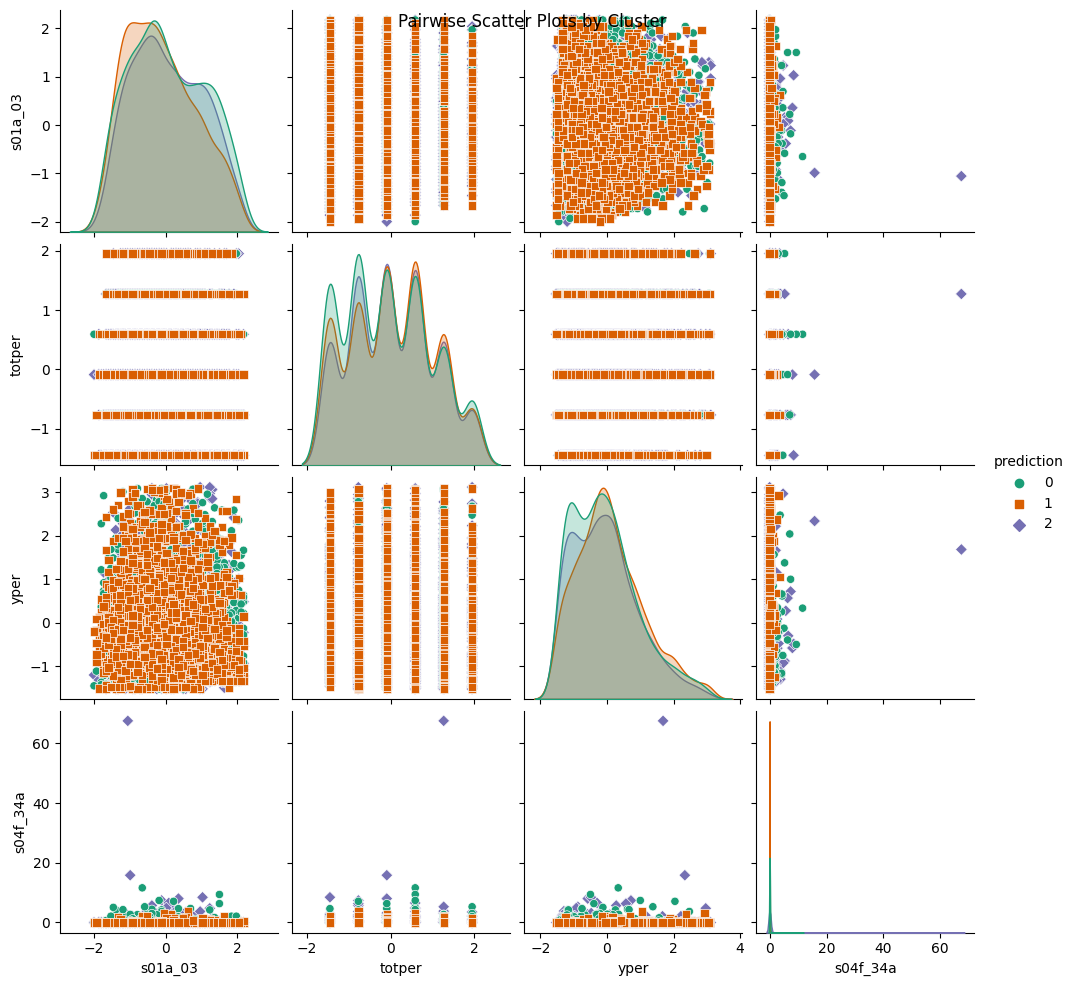

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns of interest
selected_columns = ['s01a_03', 'totper', 'yper', 's04f_34a', 'prediction']

# Subset the DataFrame with the selected columns
subset_df = predictions_pandas[selected_columns]

# Create scatter plots for each pair of quantitative columns
sns.pairplot(data=subset_df, hue='prediction', palette='Dark2', markers=['o', 's', 'D'])
plt.suptitle('Pairwise Scatter Plots by Cluster')
plt.show()


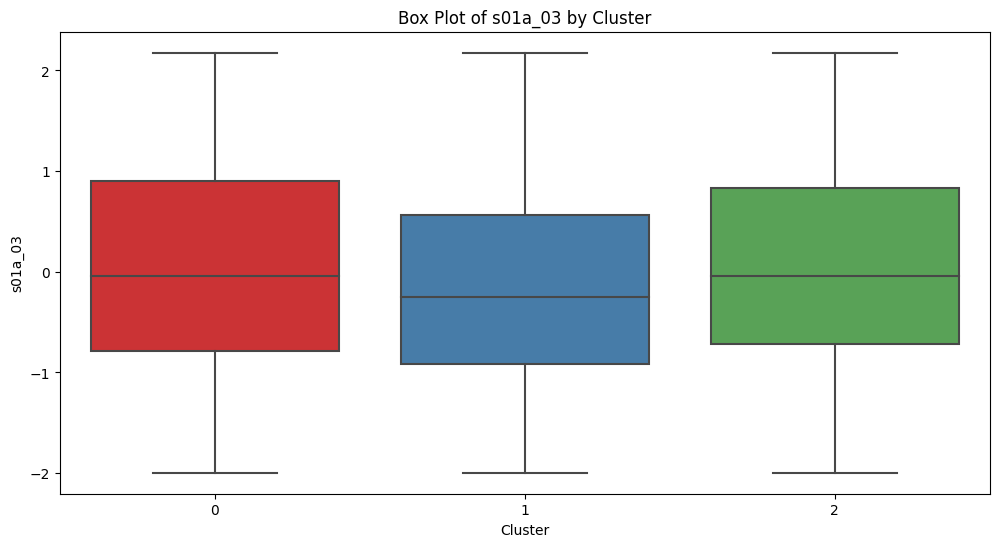

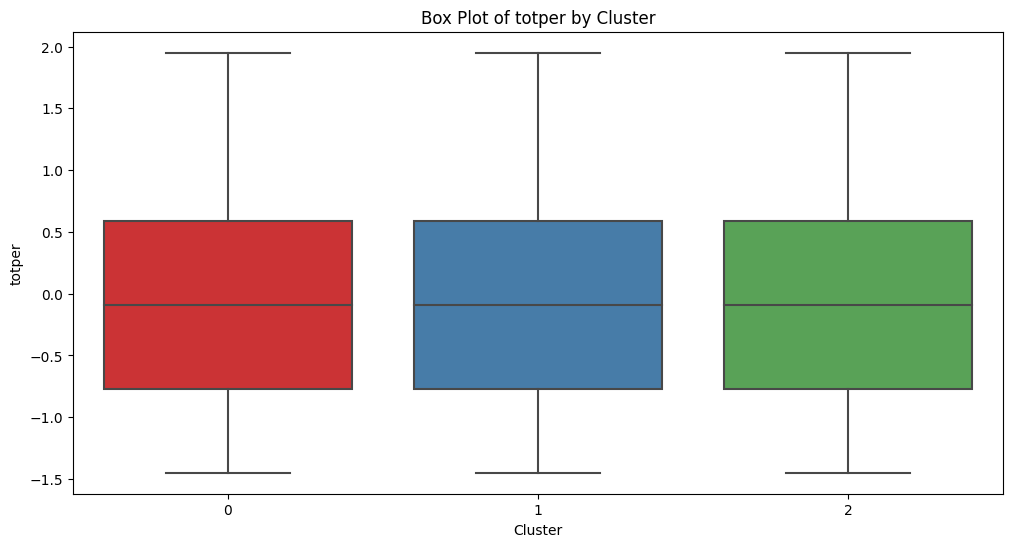

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns of interest
selected_columns = ['s01a_03', 'totper', 'yper', 's04f_34a', 'prediction']

# Subset the DataFrame with the selected columns
subset_df = predictions_pandas[selected_columns]

# Create box plots for each quantitative column by cluster
plt.figure(figsize=(12, 6))
sns.boxplot(data=subset_df, x='prediction', y='s01a_03', palette='Set1')
plt.title('Box Plot of s01a_03 by Cluster')
plt.xlabel('Cluster')
plt.ylabel('s01a_03')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=subset_df, x='prediction', y='totper', palette='Set1')
plt.title('Box Plot of totper by Cluster')
plt.xlabel('Cluster')
plt.ylabel('totper')
plt.show()

# Repeat the above code for 'yper' and 's04f_34a'


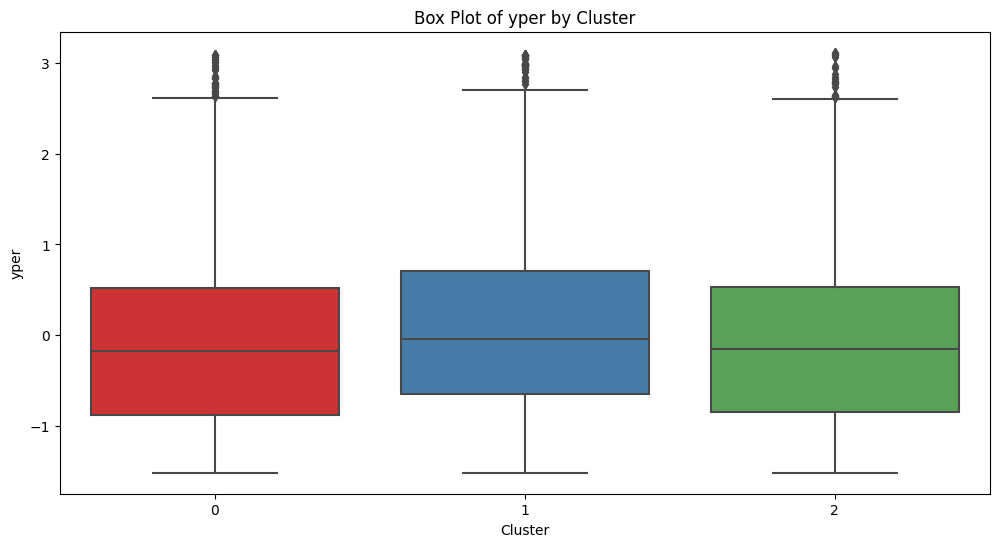

In [ ]:
# Create box plots for each quantitative column by cluster
plt.figure(figsize=(12, 6))
sns.boxplot(data=subset_df, x='prediction', y='yper', palette='Set1')
plt.title('Box Plot of yper by Cluster')
plt.xlabel('Cluster')
plt.ylabel('yper')
plt.show()

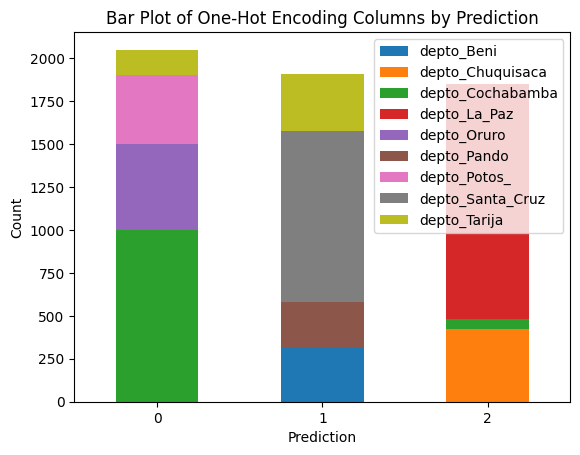

In [ ]:
selected_columns = [
    'depto_Beni',
    'depto_Chuquisaca',
    'depto_Cochabamba',
    'depto_La_Paz',
    'depto_Oruro',
    'depto_Pando',
    'depto_Potos_',
    'depto_Santa_Cruz',
    'depto_Tarija',
]
grouped = predictions_pandas.groupby('prediction')[selected_columns].sum()
grouped.plot(kind='bar', stacked=True)
plt.xlabel('Prediction')
plt.ylabel('Count')
plt.title('Bar Plot of One-Hot Encoding Columns by Prediction')
plt.xticks(rotation=0)  # Ensure the x-axis labels are not rotated

plt.show()

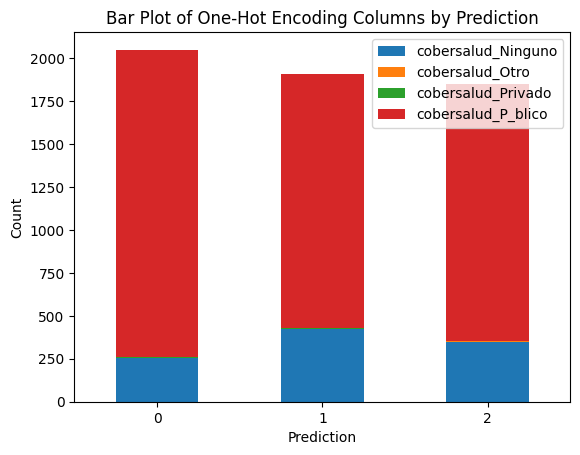

In [ ]:
selected_columns = [
    'cobersalud_Ninguno',
    'cobersalud_Otro',
    'cobersalud_Privado',
    'cobersalud_P_blico',
]
grouped = predictions_pandas.groupby('prediction')[selected_columns].sum()
grouped.plot(kind='bar', stacked=True)
plt.xlabel('Prediction')
plt.ylabel('Count')
plt.title('Bar Plot of One-Hot Encoding Columns by Prediction')
plt.xticks(rotation=0)  # Ensure the x-axis labels are not rotated

plt.show()

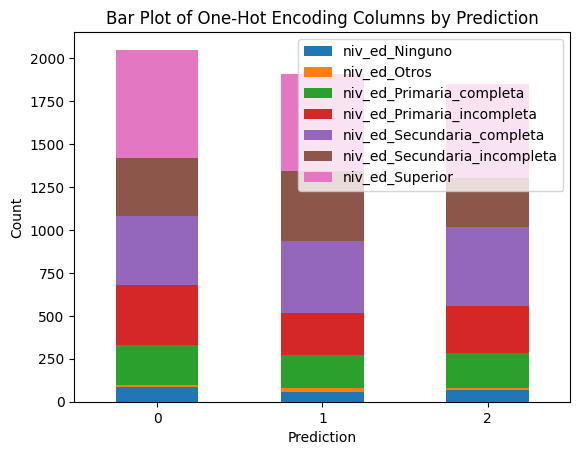

In [ ]:
selected_columns = [
    'niv_ed_Ninguno',
    'niv_ed_Otros',
    'niv_ed_Primaria_completa',
    'niv_ed_Primaria_incompleta',
    'niv_ed_Secundaria_completa',
    'niv_ed_Secundaria_incompleta',
    'niv_ed_Superior',
]
grouped = predictions_pandas.groupby('prediction')[selected_columns].sum()
grouped.plot(kind='bar', stacked=True)
plt.xlabel('Prediction')
plt.ylabel('Count')
plt.title('Bar Plot of One-Hot Encoding Columns by Prediction')
plt.xticks(rotation=0)  # Ensure the x-axis labels are not rotated

plt.show()

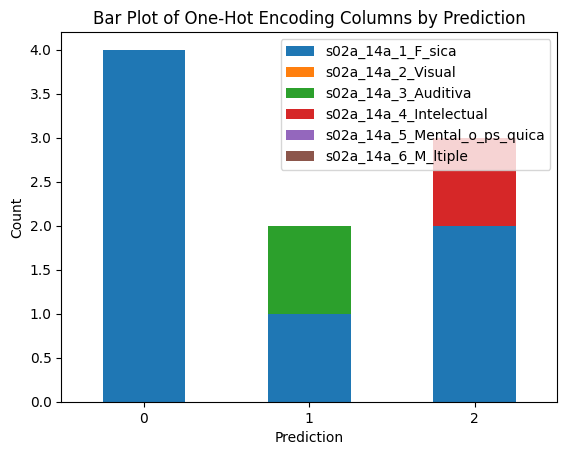

In [ ]:
selected_columns = [
    's02a_14a_1_F_sica',
    's02a_14a_2_Visual',
    's02a_14a_3_Auditiva',
    's02a_14a_4_Intelectual',
    's02a_14a_5_Mental_o_ps_quica',
    's02a_14a_6_M_ltiple',
]
grouped = predictions_pandas.groupby('prediction')[selected_columns].sum()
grouped.plot(kind='bar', stacked=True)
plt.xlabel('Prediction')
plt.ylabel('Count')
plt.title('Bar Plot of One-Hot Encoding Columns by Prediction')
plt.xticks(rotation=0)  # Ensure the x-axis labels are not rotated

plt.show()

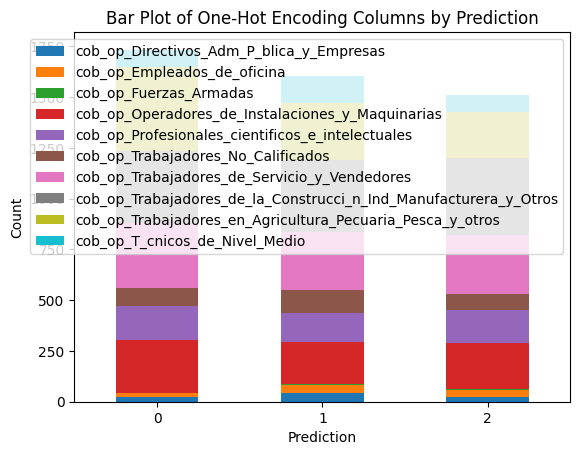

In [ ]:
selected_columns = [
    'cob_op_Directivos_Adm_P_blica_y_Empresas',
    'cob_op_Empleados_de_oficina',
    'cob_op_Fuerzas_Armadas',
    'cob_op_Operadores_de_Instalaciones_y_Maquinarias',
    'cob_op_Profesionales_cientificos_e_intelectuales',
    'cob_op_Trabajadores_No_Calificados',
    'cob_op_Trabajadores_de_Servicio_y_Vendedores',
    'cob_op_Trabajadores_de_la_Construcci_n_Ind_Manufacturera_y_Otros',
    'cob_op_Trabajadores_en_Agricultura_Pecuaria_Pesca_y_otros',
    'cob_op_T_cnicos_de_Nivel_Medio',
]
grouped = predictions_pandas.groupby('prediction')[selected_columns].sum()
grouped.plot(kind='bar', stacked=True)
plt.xlabel('Prediction')
plt.ylabel('Count')
plt.title('Bar Plot of One-Hot Encoding Columns by Prediction')
plt.xticks(rotation=0)  # Ensure the x-axis labels are not rotated

plt.show()

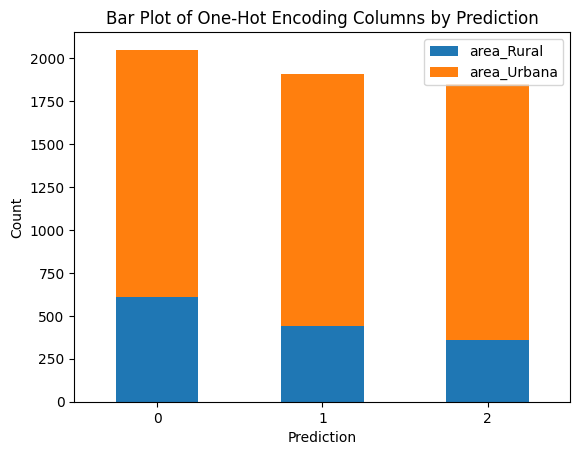

In [ ]:
selected_columns = [
 'area_Rural',
 'area_Urbana',
]
grouped = predictions_pandas.groupby('prediction')[selected_columns].sum()
grouped.plot(kind='bar', stacked=True)
plt.xlabel('Prediction')
plt.ylabel('Count')
plt.title('Bar Plot of One-Hot Encoding Columns by Prediction')
plt.xticks(rotation=0)  # Ensure the x-axis labels are not rotated

plt.show()

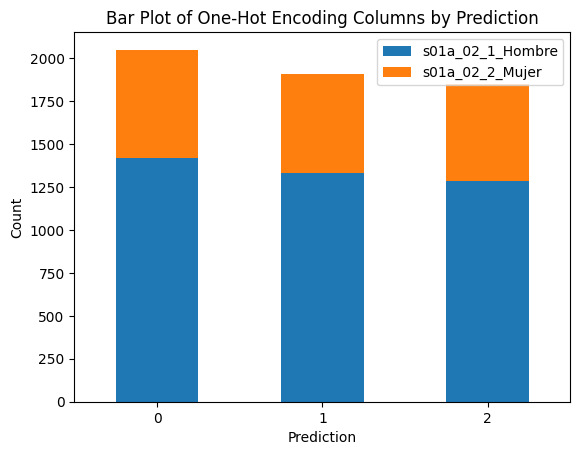

In [ ]:
selected_columns = [
 's01a_02_1_Hombre',
 's01a_02_2_Mujer',
]
grouped = predictions_pandas.groupby('prediction')[selected_columns].sum()
grouped.plot(kind='bar', stacked=True)
plt.xlabel('Prediction')
plt.ylabel('Count')
plt.title('Bar Plot of One-Hot Encoding Columns by Prediction')
plt.xticks(rotation=0)  # Ensure the x-axis labels are not rotated

plt.show()

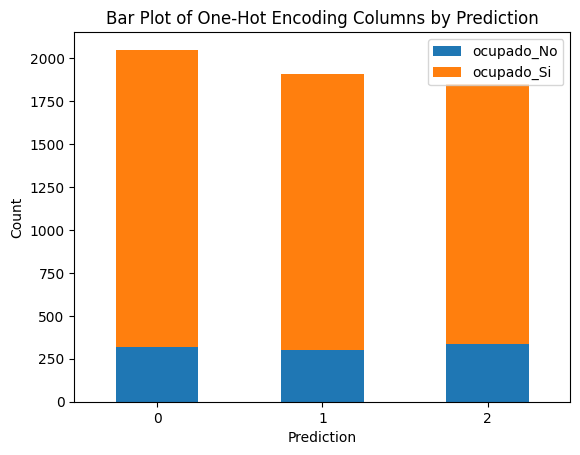

In [ ]:
selected_columns = [
 'ocupado_No',
 'ocupado_Si',
]
grouped = predictions_pandas.groupby('prediction')[selected_columns].sum()
grouped.plot(kind='bar', stacked=True)
plt.xlabel('Prediction')
plt.ylabel('Count')
plt.title('Bar Plot of One-Hot Encoding Columns by Prediction')
plt.xticks(rotation=0)  # Ensure the x-axis labels are not rotated

plt.show()

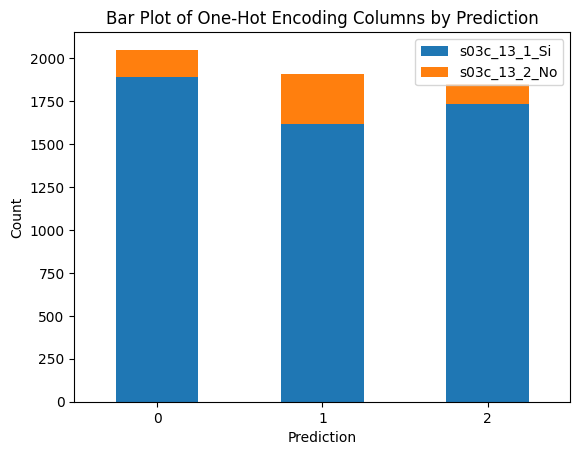

In [ ]:
selected_columns = [
 's03c_13_1_Si',
 's03c_13_2_No',
]
grouped = predictions_pandas.groupby('prediction')[selected_columns].sum()
grouped.plot(kind='bar', stacked=True)
plt.xlabel('Prediction')
plt.ylabel('Count')
plt.title('Bar Plot of One-Hot Encoding Columns by Prediction')
plt.xticks(rotation=0)  # Ensure the x-axis labels are not rotated

plt.show()

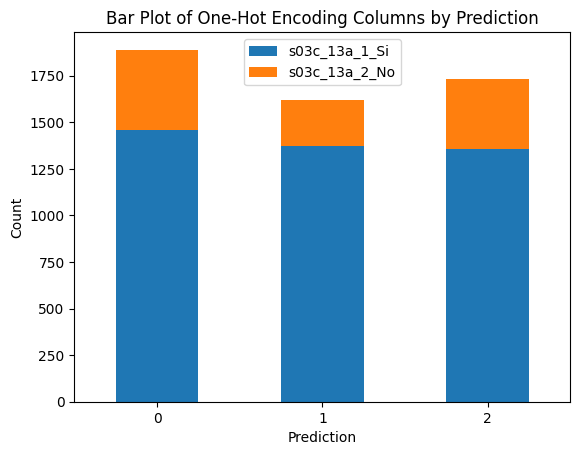

In [ ]:
selected_columns = [
 's03c_13a_1_Si',
 's03c_13a_2_No',
]
grouped = predictions_pandas.groupby('prediction')[selected_columns].sum()
grouped.plot(kind='bar', stacked=True)
plt.xlabel('Prediction')
plt.ylabel('Count')
plt.title('Bar Plot of One-Hot Encoding Columns by Prediction')
plt.xticks(rotation=0)  # Ensure the x-axis labels are not rotated

plt.show()

## Por área: salud, educación, trabajo

In [ ]:
spark.stop()